In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
import datetime
import scipy
import scipy.stats as stat
import seaborn
%matplotlib inline

Učitavamo podatke iz csv datoteke i prikazujemo prvih nekoliko podataka.

In [2]:
data=pd.read_csv("vehicles.csv")
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Izbacivanje značajki

Prvo pogledajmo koje to sve značajke naši podatci posjeduju i kojeg su one tipa.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Dakle, imamo 26 značajki od kojih je 5 tipa float, 2 su tipa int a ostale su tipa object. Odmah uočimo da tablica sadrži podatke o url adresi, kao i region_url, image_url, VIN (Vehicle Identification Number) te id oglasa. Kako je cilj našeg zadatka predviđanje cijene automobila, ove značajke možemo ukloniti iz tablice. Naime, sve navedene značajke su samo oznake pridružene svakom pojedinačnom podatku, slici i području i ne odgovaraju stvarnim značajkama automobila, koje bi mogle igrati ulogu u određivanju cijene.

Osim toga, izbacujemo i značajku 'description' jer ju ne bismo mogli na jednostavan način transformirati u numeričku značajku. Ne očekujemo da ćemo time izgubiti previše informacija jer se po svojoj prirodi ta značajka čini manje relevantnom od preostalih.

In [4]:
to_drop=['id','url','region_url','image_url','description','VIN']
data.drop(to_drop, inplace=True, axis=1)
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Iz gornjeg prikaza početnih vrijednosti u tablici, a i iz prikaza značajki vidimo da tablica, pogotovo u određenim retcima, sadrži dosta NaN vrijednosti. Pogledajmo još jednom detaljnije broj NaN vrijednosti i broj različitih vrijednosti koje poprima svaka značajka.

In [5]:
data.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [6]:
data.nunique(axis=0, dropna=True)

region             404
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

Primijetimo da stupac "county" sadrži samo NaN vrijednosti, pa ga izbacujemo.

In [7]:
data.drop('county', inplace=True, axis=1)

Pogledajmo kako sada izgleda začelje tablice.

In [8]:
data.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


Posljednji stupac, 'posting_date', predstavlja trenutak objavljivanja oglasa, uzevši u obzir i vremensku zonu. Posting_date bi nam mogao biti od koristi samo ako dolazi iz velikog intervala - npr. ako je u pitanju više različitih godina. Provjerimo zato iz kojeg intervala dolaze ti podatci. 

In [9]:
vremena=pd.to_datetime(data["posting_date"],utc=True)
vremena=vremena.dt.strftime('%Y')
vremena=vremena[vremena.notna()]
vremena=vremena.astype(int)
vremena.describe()

count    426812.0
mean       2021.0
std           0.0
min        2021.0
25%        2021.0
50%        2021.0
75%        2021.0
max        2021.0
Name: posting_date, dtype: float64

Vidimo da su zapravo da su u pitanju samo oglasi objavljeni u 2021 godini, pa taj stupac također izbacujemo.

In [10]:
data.drop('posting_date', inplace=True, axis=1)

Prije transformiranja podataka izbacimo i stupce 'lat' i 'long' koji nam daju koordinate.

In [11]:
to_drop=['lat','long']
data.drop(to_drop, inplace=True, axis=1)

In [12]:
data.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN,wy


Prije daljnjeg odabira značajki, izbacimo nepotrebne unose. Pogledajmo još jednom trenutni broj nul vrijednosti po svim značajkama.

In [13]:
data.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Primijetimo da neke značajke (condition, cylinders, drive, size, paint_color) u trećini ili više slučajeva imaju NaN vrijednost. Pogledom na prvih 10 unosa tablice vidimo da potencijalno imamo dosta unosa koji za većinu značajki imaju NaN vrijednost.

In [14]:
data.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


Da ne bismo svim ili većini značajki dodjeljivali slučajnu vrijednost, izbacimo unose koji imaju 6 (toliko je onih koje se ističu brojem NaN vrijednosti) ili više značajki sa NaN vrijednošću.

In [15]:
data = data[data.isnull().sum(axis=1) < 6]

Pogledajmo još jednom broj različitih vrijednosti koje poprimaju značajke 'model' i 'region'.

In [16]:
data['model'].nunique()

27101

In [17]:
data['region'].nunique()

404

Dakle, ove dvije značajke poprimaju 27101 odnosno 404 različite vrijednosti. Kada bismo ih transformirali u numeričke varijable, prirodno bi bilo transformirati ih koristeći one-hot encoding. To bi nam uvelike povećalo broj značajki i usporilo proces učenja. Također, pogledajmo npr doprinos najčešćih vrijednosti:

In [18]:
data['model'].value_counts()[:2000].sum()

299388

In [19]:
data['region'].value_counts()[:100].sum()

245777

Dakle, tek najčešćih 2000 (za značajku 'model') odnosno najčešćih 100 (za značajku 'region') vrijednosti nam daju preko 50% podataka. Iz tog razloga ćemo i ove značajke izbaciti iz tablice. Osim toga, značajke 'model' i 'region' su zapravo specifičnije verzije značajki 'manufacturer' i 'state' pa njih eventualno možemo koristiti u specifičnim modelima u kojima bi predviđali cijenu automobila određenog proizvođača odnosno iz određene savezne države.

In [20]:
to_drop=['model','region']
data.drop(to_drop, inplace=True, axis=1)

In [21]:
data.isna().sum()

price                0
year               877
manufacturer     12754
condition       130395
cylinders       133484
fuel              1658
odometer          3271
title_status      6942
transmission      1516
drive            86631
size            261743
type             49504
paint_color      86273
state                0
dtype: int64

Pogledajmo sada detaljnije značajke 'size' i 'type'. Značajka size nedostaje u velikom broju unosa, njih preko 50 posto. Također, prirodno je očekivati da su 'size' i 'type' međusobno korelirane. Naprimjer, po prirodni podataka, svaki automobil tipa truck će biti označen kao full-size itd. Prikažimo moguće vrijednosti koje poprimaju ove značajke, te se uvjerimo u njihovu koreliranost.

In [22]:
data['size'].value_counts()

full-size      63463
mid-size       34476
compact        19383
sub-compact     3194
Name: size, dtype: int64

In [23]:
data['type'].value_counts()

sedan          86767
SUV            76997
pickup         43367
truck          35244
other          21707
coupe          19179
hatchback      16575
wagon          10741
van             8525
convertible     7712
mini-van        4820
offroad          609
bus              512
Name: type, dtype: int64

Da ispitamo koreliranost ovih značajki, koristit ćemo Chi2 test koreliranosti, sa razinom značajnosti od 95%, i nultom hipotezom koja tvrdi da ove dvije značajke nisu međusobno korelirane. Prvo gradimo tablicu frekvencija a zatim ju kao argument dajemo chi2_contingency funkciji.

In [24]:
contingency_table=pd.crosstab(data['size'], data['type'])
contingency_table

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon
size,,,,,,,,,,,,,
compact,2289,33,1125,2235,2602,66,44,785,453,7577,263,203,1140
full-size,14738,211,574,1523,571,1450,232,666,8235,13748,15542,2777,622
mid-size,11727,27,1087,2260,1251,701,126,222,870,12325,1574,534,1022
sub-compact,225,1,493,911,540,26,7,50,25,784,22,4,44


In [25]:
val=stat.chi2_contingency(contingency_table)
val

Chi2ContingencyResult(statistic=38882.700759739375, pvalue=0.0, dof=36, expected_freq=array([[4.67768128e+03, 4.39052178e+01, 5.29283858e+02, 1.11845314e+03,
        8.01270225e+02, 3.62056631e+02, 6.60192430e+01, 2.78120185e+02,
        1.54685185e+03, 5.55820688e+03, 2.80880403e+03, 5.67862339e+02,
        4.56485132e+02],
       [1.51378865e+04, 1.42085826e+02, 1.71286552e+03, 3.61953193e+03,
        2.59306632e+03, 1.17168569e+03, 2.13651113e+02, 9.00051020e+02,
        5.00591348e+03, 1.79874387e+04, 9.08983622e+03, 1.83771299e+03,
        1.47727469e+03],
       [8.38477166e+03, 7.87003655e+01, 9.48744479e+02, 2.00483394e+03,
        1.43628167e+03, 6.48988676e+02, 1.18339888e+02, 4.98532095e+02,
        2.77274118e+03, 9.96311906e+03, 5.03479801e+03, 1.01789664e+03,
        8.18252329e+02],
       [7.78660524e+02, 7.30859114e+00, 8.81061409e+01, 1.86180985e+02,
        1.33381788e+02, 6.02690071e+01, 1.09897565e+01, 4.62967005e+01,
        2.57493488e+02, 9.25235394e+02, 4.67561

Kao rezultat smo dobili p vrijednosti 0.0 (preciznije, p < 0.0001) pa zaključujemo da su ove dvije značajke međusobno korelirane. Kao rezultat toga, apriori pretpostavke da tip automobila određuje njegovu veličinu, te činjenice da prevelik dio podataka ne sadrži informaciju o veličini automobila, značajku 'size' izbacujemo iz tablice.

In [26]:
data.drop('size', inplace=True, axis=1)

Iako neke od preostalih značajki još uvijek imaju relativno dosta NaN vrijednosti (20-30%), nećemo ih izbacivati jer bi mogle imati značajnu ulogu u predviđanju, pa se isplati NaN vrijednosti riješiti na drugačiji način. Sve ćemo preostale značajke koristiti u predviđanju.

# Čišćenje podataka

## Price

Posvetimo se sad čišćenju podataka od pogrešnih vrijednosti, outliera itd.
Pogledajmo prvo kako se kreću cijene automobila (varijabla koju predviđamo).

In [27]:
data['price'].describe()

count    3.822590e+05
mean     5.747162e+04
std      1.046069e+07
min      0.000000e+00
25%      6.000000e+03
50%      1.450000e+04
75%      2.699000e+04
max      3.736929e+09
Name: price, dtype: float64

Za početak vidimo da su minimalne i maksimalne vrijednosti nerealne. Minimalna vrijednost je 0 (što bi predstavljalo besplatno djeljenje) a maksimalna se mjeri u milijardama dolara, što nisu realne cijene za automobile. To očito nisu obični outlieri neko rezultati pogrešnog unosa, lažnog oglasa itd. 
Pogledajmo za početak koliko automobila ima cijenu veću od npr. milijun dolara, što nam se čini kao prirodna ocjena za nerealnu cijenu automobila.

In [28]:
data[data['price']>=1e+6].sort_values(by='price')

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
219241,1111111,1970.0,dodge,fair,8 cylinders,gas,42000.0,clean,automatic,rwd,coupe,blue,ms
283429,1111111,1994.0,chevrolet,NaN,8 cylinders,gas,1111111.0,clean,manual,NaN,NaN,NaN,nh
155421,1234567,2006.0,jeep,like new,6 cylinders,gas,123456.0,clean,automatic,4wd,SUV,custom,in
194292,1234567,2010.0,lincoln,like new,NaN,gas,85653.0,clean,automatic,NaN,SUV,custom,mi
68935,2000000,2002.0,saturn,good,4 cylinders,gas,164290.0,clean,automatic,fwd,sedan,green,ca
327938,3226714,2002.0,NaN,fair,8 cylinders,diesel,1234.0,clean,manual,4wd,sedan,blue,pa
105843,6995495,2014.0,dodge,NaN,4 cylinders,gas,135888.0,clean,automatic,fwd,SUV,NaN,fl
303014,12345678,2019.0,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,truck,black,oh
288400,12345678,2019.0,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,truck,black,oh
286324,12345678,2019.0,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,truck,black,oh


Možemo primijetiti da ovakvih unosa nema previše, i da većinom predstavljaju unose koji se mjere u desetcima milijuna dolara i više, što su nerealni unosi. Oni unosi čija se cijena mjeri u nekoliko milijuna se također čine kao netočni unosi (svi su oblika '1111111', '1234567' itd.). Iz tog razloga ćemo prije nego pogledamo ostatak unosa, izbrisati sve unose sa cijenom preko milijun dolara.

In [29]:
data=data[data['price']<1e+6]

Učinimo sad slično sa najnižim cijenama.

In [30]:
data[data['price']<=100]['price'].value_counts()

0      28490
1       1301
99       812
100      119
85        27
       ...  
92         1
28         1
43         1
59         1
39         1
Name: price, Length: 86, dtype: int64

Primijetimo da ako odaberemo unose sa cijenom manjom od 100 dolara, daleko najveći broj unosa za cijenu ima 0 ili 1 dolar. Ti unosi nam se također čine nerealnim, vjerojatno lažnim unosima. Pošto se takvi unosi čine kao namjerni, lažni unosi, izbacit ćemo ih iz skupa podataka, umjesto da cijenu mijenjamo u mean ili median. Naime, ako su stvarno lažni unosi, ne možemo očekivati da ćemo usporedbom s ostalim unosima dobiti neku relevantnu informaciju, pa iako ćemo time izgubiti relativno dosta podataka, to nam se čini kao bolja opcija.

In [31]:
data=data[data['price']>100]

Pogledajmo kakav je utjecaj ovo napravilo na skup podatak u odnosu na cijenu.

In [32]:
data['price'].describe()

count    351093.000000
mean      19494.825380
std       15583.319564
min         101.000000
25%        7950.000000
50%       15995.000000
75%       27990.000000
max      999999.000000
Name: price, dtype: float64

Vidimo da su se npr. mean i std značajno popravili, više nisu reda veličine 1e+4 i 1e-7, nego reda veličine 1e+2. Ipak, maksimalna cijena je još uvijek prevelika, pa pogledajmo možemo li bolje procijeniti gornju prihvatljivu granicu.

In [33]:
data[data['price']>300000].sort_values(by='price')

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
88588,304995,2021.0,porsche,NaN,NaN,gas,22.0,clean,automatic,NaN,convertible,white,dc
90274,304995,2021.0,porsche,NaN,NaN,gas,22.0,clean,automatic,NaN,convertible,white,dc
399462,304995,2021.0,porsche,NaN,NaN,gas,22.0,clean,automatic,NaN,convertible,white,va
44387,347999,2020.0,ferrari,excellent,8 cylinders,gas,3000.0,clean,automatic,NaN,coupe,NaN,ca
45428,349999,2020.0,ferrari,excellent,8 cylinders,gas,2800.0,clean,automatic,NaN,coupe,NaN,ca
328193,400123,2003.0,NaN,fair,5 cylinders,diesel,123321.0,clean,automatic,4wd,pickup,blue,pa
133497,425000,1993.0,jeep,NaN,NaN,gas,380.0,clean,automatic,NaN,NaN,red,id
360604,449500,2019.0,ferrari,NaN,NaN,gas,500.0,clean,NaN,NaN,coupe,red,tn
113357,470000,2016.0,NaN,good,NaN,diesel,167268.0,clean,automatic,NaN,NaN,white,fl
106361,516999,2016.0,NaN,like new,12 cylinders,gas,9982.0,clean,automatic,4wd,convertible,white,fl


Vidimo da postoji samo par vrijednosti preko 900000 dolara, a da ostali unosi sa cijenom npr. preko 400 tisuća (što je njih nekoliko), imaju sumnjive unose - ili su od nepoznatog proizvođača, ili nisu u sjajnom stanju (što ne opravdava cijenu). Izbacimo zato sve unose sa cijenom preko 400 tisuća.

In [34]:
data=data[data['price']<400000]

In [35]:
data['price'].describe()

count    351084.000000
mean      19479.768961
std       15256.706769
min         101.000000
25%        7950.000000
50%       15995.000000
75%       27990.000000
max      349999.000000
Name: price, dtype: float64

Činjenica da je std približno 15000, izbacivanje svih klasičnih outliera bi rezultiralo izbacivanjem previše relevantnih unosa, pa ćemo zasad zadržati sve preostale unose.

## Year

Prisjetimo se koliko imamo nul vrijednosti za značajku 'year' i nekoliko takvih unosa.

In [36]:
data['year'].isna().sum()

863

In [37]:
data[data['year'].isna()].sample(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
90089,28500,NaN,NaN,NaN,4 cylinders,gas,27148.0,clean,automatic,NaN,sedan,black,dc
161065,16995,NaN,NaN,NaN,4 cylinders,gas,23229.0,rebuilt,automatic,fwd,hatchback,black,ia
51633,45587,NaN,NaN,NaN,8 cylinders,gas,41380.0,clean,automatic,4wd,NaN,grey,ca
381610,84995,NaN,NaN,NaN,8 cylinders,diesel,71.0,clean,automatic,4wd,pickup,white,tx
161181,14495,NaN,NaN,NaN,4 cylinders,gas,10964.0,rebuilt,automatic,NaN,hatchback,white,ia


Primijetimo da u danom uzorku unosa, svi unosi bez značajke 'year', također imaju NaN vrijednost u značajkama 'manufacturer' i 'condition'. Provjerimo je li to slučajnost.

Vidimo da je mean jednak 2011, a najmanja vrijednost je 1900. Dakle, većina automobila je novija. Pogledajmo kakva je prosječna cijena automobila bez značajke 'year', te automobila starijih odnosno mlađih od 1990.

In [38]:
len(data[data['year'].isna() & data['manufacturer'].isna() & data['condition'].isna()])

859

Dakle, od 863 unosa, njih 859 ima NaN vrijednosti i za manufacturer i condition. Dakle, za takve unose bismo morali postaviti nove vrijednosti svih tih značajki. Umjesto toga, izbacit ćemo ih sve iz skupa podataka, kako ne bismo unosili previše nasumičnih vrijednosti u skup podataka.

In [39]:
data=data[data['year'].notna()]

## Manufacturer

In [40]:
data['manufacturer'].isna().sum()

11291

Pogledajmo kakav je median po proizvođačima te po unosima bez značajke 'manufacturer'. Koristimo median jer je std cijene prevelika, tj. podatci su pozitivno skewed.

In [41]:
data.groupby('manufacturer')['price'].median().sort_values(ascending=False)

manufacturer
ferrari            105000.0
aston-martin        52000.0
tesla               37990.0
porsche             30000.0
ram                 29995.0
alfa-romeo          29590.0
jaguar              28990.0
rover               25972.5
audi                24990.5
gmc                 24590.0
infiniti            21990.0
acura               20590.0
lexus               20590.0
lincoln             19999.0
mercedes-benz       19900.0
morgan              19150.0
jeep                18989.0
bmw                 18725.0
cadillac            18490.0
datsun              17900.0
ford                17530.0
chevrolet           16884.0
mitsubishi          15990.0
volvo               14997.0
toyota              14500.0
buick               13905.5
dodge               13217.5
mini                12998.0
volkswagen          12400.0
kia                 11995.0
harley-davidson     11975.0
subaru              11900.0
nissan              10995.0
mazda               10995.0
hyundai             10990.0
fiat   

In [42]:
data[data['manufacturer'].isna()]['price'].median()

14150.0

Pogledajmo nekoliko proizvođača za koje je mean najbliži meanu od skupa podataka sa NaN vrijednošću značajke 'manufacturer'. Sve podatke sa NaN manufacturerom ćemo onda pridružiti najzastupljenijem proizvođaču od njih, kako ne bismo slučajno odabrali proizvođača sa relativno malo unosa.

In [43]:
najblizi=['volvo','toyota','buick','dodge','mini']
data[data['manufacturer'].isin(najblizi)]['manufacturer'].value_counts()

toyota    29191
dodge     10746
buick      4636
volvo      2960
mini       2149
Name: manufacturer, dtype: int64

Vidimo da je najviše toyota u danom skupu, pa tako provodimo imputation.

In [44]:
data['manufacturer'].fillna('toyota', inplace=True)

## Fuel

Ponovimo isto postupak za značajku 'fuel' kao i za 'title_status' i 'transmission' u nastavku,

In [45]:
data['fuel'].value_counts()

gas         294008
other        26944
diesel       21632
hybrid        4533
electric      1548
Name: fuel, dtype: int64

In [46]:
data['title_status'].value_counts()

clean         332132
rebuilt         6182
salvage         3229
lien            1335
missing          534
parts only       122
Name: title_status, dtype: int64

In [47]:
data.groupby('fuel')['price'].median().sort_values(ascending=False)

fuel
diesel      30990.0
other       27990.0
electric    25590.0
gas         14000.0
hybrid      12995.0
Name: price, dtype: float64

In [48]:
data[data['fuel'].isna()]['price'].median()

17914.5

Vidimo da je median cijene za unose kojima nedostaje oznaka za 'fuel' najbliži medianu cijene za 'gas'. Imputati trebamo vrijednost za samo 1556 unosa, pa uzevši u obzir da je automobila sa vrijednošču 'gas' daleko najviše, tako i postupamo.

In [49]:
data['fuel'].fillna('gas', inplace=True)

## Title_status

In [50]:
data['title_status'].value_counts()

clean         332132
rebuilt         6182
salvage         3229
lien            1335
missing          534
parts only       122
Name: title_status, dtype: int64

In [51]:
data['title_status'].isna().sum()

6687

U ovom slučaju je broj oznaka 'clean' daleko veći od svih ostalih, pa ćemo imputation provesti odmah u značajku 'clean'. Naime, broj podataka koje imputamo je veći od trenutnog broja svih ostalih oznaka za značajku 'title_status' pa bi promjena bila prevelika.

In [52]:
data['title_status'].fillna('clean', inplace=True)

## Transmission

In [53]:
data['transmission'].value_counts()

automatic    268280
other         60181
manual        20428
Name: transmission, dtype: int64

In [54]:
data['transmission'].isna().sum()

1332

In [55]:
data.groupby('transmission')['price'].median().sort_values(ascending=False)

transmission
other        28590.0
automatic    13490.0
manual       10000.0
Name: price, dtype: float64

In [56]:
data[data['transmission'].isna()]['price'].median()

16995.0

Vidimo da je median cijene za podatke kojima nedostaje oznaka za transmission najbliži onima sa oznakom 'automatic'. Kako je takvih ujedno i daleko najviše, imputing radimo sa oznakom 'automatic'.

In [57]:
data['transmission'].fillna('automatic', inplace=True)

## Odometer

Odometer je zadan kao numerička značajka pa ćemo prvo provjeriti kako su vrijednosti raspoređene.

In [58]:
data['odometer'].describe()

count    3.483520e+05
mean     9.477599e+04
std      1.685381e+05
min      0.000000e+00
25%      3.642700e+04
50%      8.410300e+04
75%      1.325660e+05
max      1.000000e+07
Name: odometer, dtype: float64

Primijetimo da je maksimalna vrijednost jednaka 10 milijuna. Kako preko 20 tisuća kilometara godišnje smatramo iznadprosječnom kilometražom, vidimo da su vrijednosti milijunske kilometraže vjerojatno lažne vrijednosti. Provjerimo pobliže takve slučajeve.

In [59]:
data.sort_values(by='odometer', ascending=False).head(20)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
292399,1300,1950.0,chevrolet,fair,8 cylinders,gas,10000000.0,clean,automatic,rwd,sedan,red,oh
191629,7500,1970.0,chevrolet,fair,8 cylinders,gas,10000000.0,parts only,automatic,rwd,coupe,red,ma
305172,4500,1995.0,chevrolet,fair,8 cylinders,gas,10000000.0,clean,automatic,rwd,sedan,custom,ok
81327,15000,1973.0,chevrolet,good,8 cylinders,gas,10000000.0,clean,automatic,rwd,NaN,silver,co
152394,3500,1954.0,ford,good,NaN,gas,10000000.0,clean,other,NaN,NaN,red,in
390252,2000,1964.0,ford,fair,6 cylinders,gas,10000000.0,clean,other,rwd,NaN,NaN,va
28738,20000,1951.0,chevrolet,good,8 cylinders,gas,10000000.0,clean,automatic,rwd,truck,custom,ca
151740,800,1949.0,ford,good,4 cylinders,gas,10000000.0,clean,manual,rwd,sedan,black,in
208157,9000,1975.0,chevrolet,good,8 cylinders,gas,10000000.0,clean,automatic,rwd,hatchback,red,mi
144436,4500,2010.0,ford,good,4 cylinders,gas,10000000.0,clean,automatic,NaN,sedan,red,il


In [60]:
data[data['odometer']>1e+6]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
562,27990,2014.0,ram,like new,6 cylinders,diesel,2222222.0,clean,automatic,4wd,truck,white,al
616,17990,2018.0,ford,like new,6 cylinders,gas,1111111.0,clean,automatic,fwd,SUV,blue,al
9878,2500,2008.0,lincoln,good,NaN,gas,1111111.0,clean,automatic,NaN,sedan,NaN,az
12929,2500,1975.0,volkswagen,fair,4 cylinders,gas,9999999.0,clean,manual,rwd,offroad,orange,az
13517,1550,1988.0,chevrolet,good,8 cylinders,gas,7654321.0,clean,automatic,rwd,van,white,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409348,5000,1978.0,volkswagen,good,4 cylinders,gas,9999999.0,clean,automatic,NaN,NaN,brown,wa
412634,600,1996.0,chevrolet,salvage,6 cylinders,gas,1942420.0,clean,automatic,4wd,SUV,green,wa
417643,39500,1958.0,chevrolet,good,8 cylinders,gas,1710000.0,clean,automatic,rwd,coupe,red,wi
419355,3500,2006.0,gmc,good,8 cylinders,gas,2621720.0,clean,automatic,4wd,pickup,black,wi


Vidimo da je automobila sa milijunskom kilometražom samo 315, te se iz prikazanog uzorka da naslutiti da su unesene vrijednosti kilometraže vjerojatno pogrešni unosi. Kako intuitivno pretpostavljamo da je kilometraža važan faktor u cijeni automobila, ovakve unose ćemo prvo izbrisati.

In [61]:
data=data[data['odometer']<1e+6]

In [62]:
data['odometer'].median()

84000.0

Provjerimo kako su vrijednosti sada raspoređene.

In [63]:
data['odometer'].describe()

count    347989.000000
mean      91402.612795
std       68599.011607
min           0.000000
25%       36390.000000
50%       84000.000000
75%      132305.000000
max      999999.000000
Name: odometer, dtype: float64

In [64]:
data[data['odometer']>800000]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
2781,23000,1967.0,chevrolet,good,8 cylinders,gas,999999.0,clean,automatic,rwd,truck,red,al
5567,3500,1997.0,mercury,NaN,NaN,gas,999999.0,clean,automatic,NaN,NaN,white,ak
6110,2200,1987.0,ford,NaN,NaN,gas,999999.0,clean,automatic,NaN,NaN,grey,ak
8616,1895,2000.0,chevrolet,good,6 cylinders,gas,999999.0,clean,automatic,fwd,mini-van,grey,az
8617,3795,2006.0,subaru,good,4 cylinders,gas,999999.0,clean,automatic,4wd,wagon,custom,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418301,23435,2007.0,toyota,excellent,NaN,diesel,934475.0,clean,manual,NaN,truck,white,wi
418405,6400,1964.0,toyota,good,6 cylinders,gas,999999.0,clean,automatic,rwd,NaN,NaN,wi
418801,5475,2008.0,dodge,excellent,4 cylinders,gas,930128.0,clean,automatic,fwd,hatchback,orange,wi
423005,59900,2000.0,toyota,NaN,6 cylinders,other,854000.0,clean,manual,rwd,NaN,red,wi


In [65]:
data[data['odometer']==999999]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
2781,23000,1967.0,chevrolet,good,8 cylinders,gas,999999.0,clean,automatic,rwd,truck,red,al
5567,3500,1997.0,mercury,NaN,NaN,gas,999999.0,clean,automatic,NaN,NaN,white,ak
6110,2200,1987.0,ford,NaN,NaN,gas,999999.0,clean,automatic,NaN,NaN,grey,ak
8616,1895,2000.0,chevrolet,good,6 cylinders,gas,999999.0,clean,automatic,fwd,mini-van,grey,az
8617,3795,2006.0,subaru,good,4 cylinders,gas,999999.0,clean,automatic,4wd,wagon,custom,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402675,22500,2003.0,ram,like new,6 cylinders,diesel,999999.0,clean,manual,4wd,pickup,silver,wa
403019,22500,2003.0,ram,like new,6 cylinders,diesel,999999.0,clean,manual,4wd,pickup,silver,wa
403465,22995,2003.0,ram,like new,6 cylinders,diesel,999999.0,clean,manual,4wd,pickup,silver,wa
407698,59500,1972.0,chevrolet,NaN,8 cylinders,gas,999999.0,clean,automatic,NaN,NaN,NaN,wa


Primijetimo da ostatak ogromnih vrijednosti kilometraže odlazi većinom na unos '999999', pa izbacimo i te podatke, jer se čine lažnima (dodatno npr condition im je like new, ili su relativno novi, title_status im je clean itd.)

In [66]:
data=data[data['odometer']<999999]

In [67]:
data['odometer'].describe()

count    347857.000000
mean      91057.831109
std       66288.935202
min           0.000000
25%       36381.000000
50%       84000.000000
75%      132237.000000
max      999000.000000
Name: odometer, dtype: float64

Uzmimo sada median od 84000 i pridružimo tu vrijednost podatcima kojima nedostaje značajka 'odometer'.

In [68]:
data['odometer'].fillna(84000, inplace=True)

## Paint_color

Primijetimo da preostale značajke na kojima nismo izvršili imputing, sadrže značajno više nul vrijednosti nego prethodne.

In [69]:
data.isna().sum()

price                0
year                 0
manufacturer         0
condition       109568
cylinders       118688
fuel                 0
odometer             0
title_status         0
transmission         0
drive            79778
type             45375
paint_color      76028
state                0
dtype: int64

Pogledajmo prvo značajku paint_color.

Prikazat ćemo grafički ovisnost cijene o boji vozila, koristeći boxplot, s tim da ćemo zanemariti iznimno visoke cijene koje nismo odbacivali zbog prirode problema.

<Axes: xlabel='price', ylabel='paint_color'>

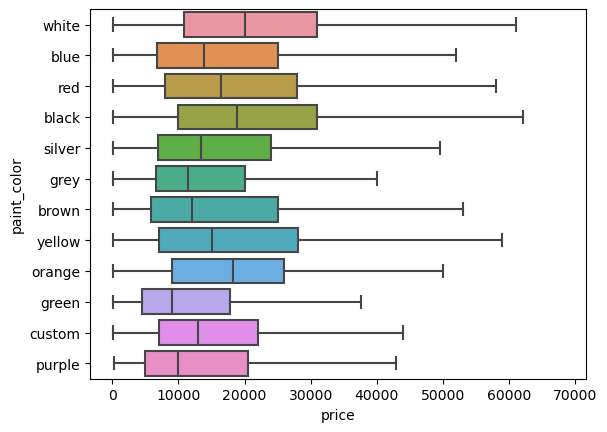

In [70]:
bound=data['price'].quantile(0.99)
under_bound=data[data['price']<bound]
seaborn.boxplot(x=under_bound['price'], y=under_bound['paint_color'], fliersize=0)

In [71]:
data['paint_color'].value_counts()

white     71331
black     57642
silver    39413
blue      28983
red       28377
grey      22339
green      6927
custom     6231
brown      6139
yellow     1963
orange     1825
purple      659
Name: paint_color, dtype: int64

In [72]:
data.groupby('paint_color')['price'].median().sort_values(ascending=False)

paint_color
white     19995.0
black     18990.0
orange    18590.0
red       16502.0
yellow    15500.0
blue      13988.0
silver    13500.0
custom    12985.0
brown     12000.0
grey      11765.0
purple     9995.0
green      8991.0
Name: price, dtype: float64

In [73]:
data[data['paint_color'].isna()]['price'].mean()

18813.21417109486

Možemo vidjeti da je prosječna cijena vozila kojima nedostaje oznaka boje najbliža prosječnoj cijeni crnih, bijelih i narančastih vozila. Također, crnih i bijelih vozila je daleko najviše. Kako se razlike u cijenama ne čine prevelikima, sve ćemo podatke kojima nedostaje oznaka boje označiti kao crne.

In [74]:
data['paint_color'].fillna('black', inplace=True)

## Type

In [75]:
data['type'].isna().sum()

45375

Pogledajmo kako je distribuirana značajka type.

In [76]:
data['type'].value_counts()

sedan          78664
SUV            69243
pickup         40525
truck          30276
other          19699
coupe          17814
hatchback      15764
wagon           9844
van             7797
convertible     7288
mini-van        4501
offroad          580
bus              487
Name: type, dtype: int64

Prikazat ćemo grafički ovisnost cijene o tipu automobila kao ranije.

<Axes: xlabel='price', ylabel='type'>

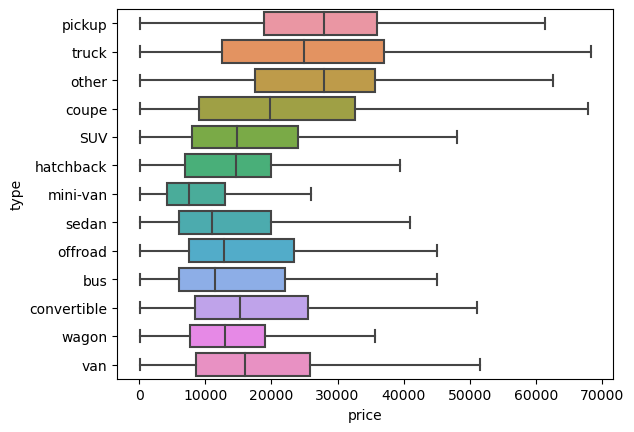

In [77]:
bound=data['price'].quantile(0.99)
under_bound=data[data['price']<bound]
seaborn.boxplot(x=under_bound['price'], y=under_bound['type'], fliersize=0)

Primijetimo da se vrijednosti značajno razlikuju po tipu auta, kako u raspršenosti vrijednosti a kako u srednjim vrijednostima. Da se naslutiti da cijena ovisi o tipu vozila. Primijetimo također da vozila tipa "offroad" i "bus" ima daleko najmanje. Ove podatke nećemo zanemariti ili izbrisati jer su legitimni unosi. Također, prirodno je očekivati takvu neravnotežu u broju unosa u odnosu na npr. "sedan", "pickup" i ostale i sastavni su dio problema. Nećemo ih niti svrstati u posebnu skupinu jer se po prirodi te vrijednosti dosta razlikuju. Nećemo ih niti svrstati u tip "other" jer se po srednjim vrijednostima dosta razlikuju od te skupine.

In [78]:
data[data['type'].isna()]['price'].median()

11000.0

In [79]:
data.groupby('type')['price'].median().sort_values(ascending=False)

type
pickup         27998.0
other          27990.0
truck          25000.0
coupe          19999.0
van            16406.0
convertible    15995.0
SUV            14900.0
hatchback      14590.0
wagon          12995.0
offroad        12947.5
bus            11800.0
sedan          10999.0
mini-van        7495.0
Name: price, dtype: float64

Dakle, prosječna cijena vozila kojima nedostaje oznaka tipa je najbliža onima s oznakom 'sedan', a kako je njih i najviše, imputing ćemo napraviti s oznakom 'sedan'.

In [80]:
data['type'].fillna('sedan', inplace=True)

## Drive

Ponovimo isti postupak kao prije.

In [81]:
data['drive'].isna().sum()

79778

In [82]:
data['drive'].value_counts()

4wd    117902
fwd     96013
rwd     54164
Name: drive, dtype: int64

<Axes: xlabel='price', ylabel='drive'>

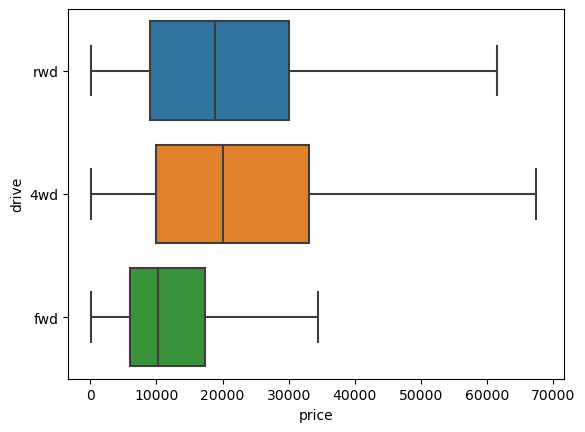

In [83]:
bound=data['price'].quantile(0.99)
under_bound=data[data['price']<bound]
seaborn.boxplot(x=under_bound['price'], y=under_bound['drive'], fliersize=0)

In [84]:
data[data['drive'].isna()]['price'].median()

17995.0

In [85]:
data.groupby('drive')['price'].median().sort_values(ascending=False)

drive
4wd    20495.0
rwd    18995.0
fwd    10350.0
Name: price, dtype: float64

S boxplota se vidi jasna ovisnost cijene o pogonu vozila. Median cijene vozila bez oznake 'drive' je najbliži 'rwd' pa '4wd', ali kako je '4wd' vozila daleko više, imputing ćemo napraviti s '4wd'.

In [86]:
data['drive'].fillna('4wd', inplace=True)

## Cylinders

In [87]:
data['cylinders'].isna().sum()

118688

In [88]:
data['cylinders'].value_counts()

6 cylinders     87198
4 cylinders     71862
8 cylinders     65494
5 cylinders      1646
10 cylinders     1152
other            1033
3 cylinders       590
12 cylinders      194
Name: cylinders, dtype: int64

<Axes: xlabel='price', ylabel='cylinders'>

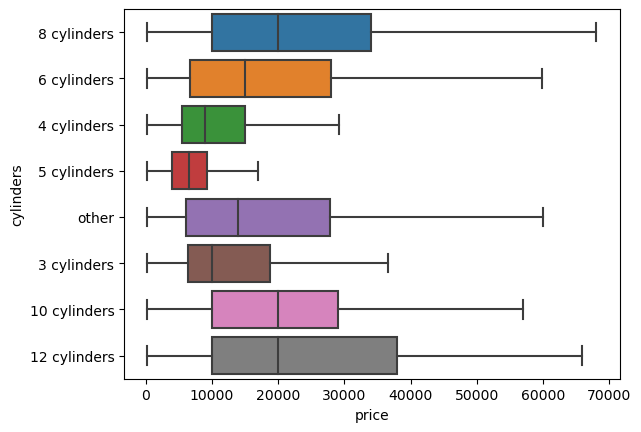

In [89]:
bound=data['price'].quantile(0.99)
under_bound=data[data['price']<bound]
seaborn.boxplot(x=under_bound['price'], y=under_bound['cylinders'], fliersize=0)

In [90]:
data[data['cylinders'].isna()]['price'].median()

19995.0

In [91]:
data.groupby('cylinders')['price'].median().sort_values(ascending=False)

cylinders
12 cylinders    29500.0
10 cylinders    20997.5
8 cylinders     20995.0
6 cylinders     15041.0
other           14900.0
3 cylinders     10122.0
4 cylinders      8995.0
5 cylinders      6499.0
Name: price, dtype: float64

Median cijene je najbliži onima s 8 ili 10 cilindara, no kako je onih s 8 cilindara daleko više, tako ćemo i imputati. Ipak, kako je imputanih vrijednosti jako mnogo, oko trećina svih vrijednosti, a razlike u boxplotovima za različite oznake su velike, napravit ćemo indikator koji signalizira da je vrijednost ove značajke imputana, što će modelu za predikciju dati više informacija.

In [92]:
imputer=SimpleImputer(missing_values= np.NaN, strategy='constant', fill_value='8 cylinders', add_indicator=True)
data.cylinders = imputer.fit_transform(data['cylinders'].values.reshape(-1,1))[:,0]

In [93]:
data['cylinders'].value_counts()

8 cylinders     184182
6 cylinders      87198
4 cylinders      71862
5 cylinders       1646
10 cylinders      1152
other             1033
3 cylinders        590
12 cylinders       194
Name: cylinders, dtype: int64

## Condition

In [94]:
data['condition'].isna().sum()

109568

In [95]:
data['condition'].value_counts()

good         118244
excellent     92194
like new      19740
fair           6516
new            1041
salvage         554
Name: condition, dtype: int64

<Axes: xlabel='price', ylabel='condition'>

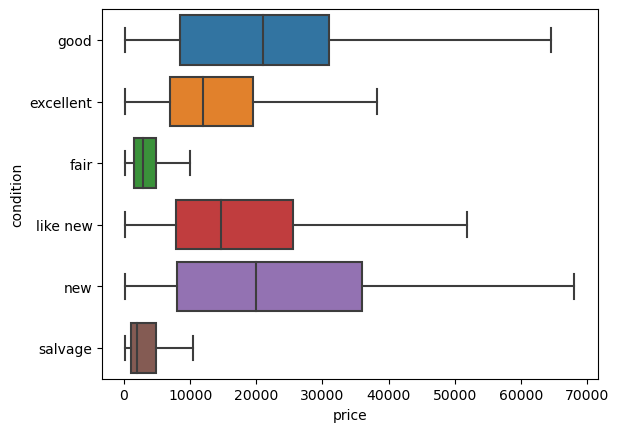

In [96]:
bound=data['price'].quantile(0.99)
under_bound=data[data['price']<bound]
seaborn.boxplot(x=under_bound['price'], y=under_bound['condition'], fliersize=0)

In [97]:
data[data['condition'].isna()]['price'].median()

17900.0

In [98]:
data.groupby('condition')['price'].median().sort_values(ascending=False)

condition
new          22500.0
good         20990.0
like new     14988.0
excellent    11995.0
fair          2800.0
salvage       2000.0
Name: price, dtype: float64

Iz boxplota možemo zaključiti da 'condition' utječe na cijenu vozila, kao što je i za očekviati. Prosječna cijena automobila kojima nedostaje oznaka 'condition' je najbliža prosječnoj cijeni automobila koji su 'good' i 'like new'. Ipak, u ovom slučaju (pogotovo zbog broja vrijednosi koje treba imputati), nećemo imputati vrijednost 'good' umjesto NaN, nego ćemo sve unose s oznakom NaN označiti kao 'missing', tj. skupit ćemo ih u posebnu skupinu. Condition se prirodno čini kao jako važna varijabla u procjeni cijene, a činjenica da ta informacija nije dana je također informacija sama po sebi (pri kupnji automobila s oglasa koji ne navodi stanje u kojem je automobil, bili bismo posebno oprezni).

In [99]:
data[data['condition'].isna()]['condition']='missing'
data.loc[data['condition'].isna(), ['condition']] = 'missing'

C:\Users\ivani\AppData\Local\Temp\ipykernel_20260\2557754758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['condition'].isna()]['condition']='missing'


In [100]:
data['condition'].value_counts()

good         118244
missing      109568
excellent     92194
like new      19740
fair           6516
new            1041
salvage         554
Name: condition, dtype: int64

## Kreiranje nove značajke

Kako bismo potencijalno dobili neke nove informacije koje ne možemo dobiti iz trenutnih značajki, kreirajmo novu značajku koja će predstavljati prosječne pređene kilometre po godini. Dobit ćemo ju tako da ćemo podijeliti vrijednost u značajki 'odometer' sa starošću automobila (gledano u odnosu na 2023). Tek u tom svjetlu značajka odometer trebala bi dati pravu informaciju tj jasno je da će jednaka kilometraža za novo auto značiti nešto drugo nego za starije auto.

In [101]:
data['average']=data['odometer']/(2023-data['year'])

## Brisanje duplikata

In [102]:
data.groupby(data.columns.tolist(), as_index=False).size().sort_values(by='size', ascending=False)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,average,size
185940,25998,2019.0,toyota,missing,8 cylinders,gas,27056.0,clean,automatic,fwd,sedan,black,mt,6764.000000,31
92845,9998,2010.0,subaru,missing,6 cylinders,gas,154817.0,clean,automatic,4wd,wagon,black,mt,11909.000000,30
201816,29998,1995.0,jeep,missing,8 cylinders,gas,100.0,clean,automatic,4wd,sedan,black,mt,3.571429,29
107258,11998,2007.0,lexus,missing,8 cylinders,gas,169194.0,clean,automatic,rwd,sedan,black,mt,10574.625000,29
168651,21998,2019.0,chevrolet,missing,4 cylinders,gas,13494.0,clean,automatic,fwd,sedan,black,mt,3373.500000,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86899,9500,1992.0,buick,excellent,6 cylinders,gas,40135.0,clean,automatic,4wd,sedan,blue,wi,1294.677419,1
86900,9500,1992.0,cadillac,excellent,8 cylinders,gas,57250.0,clean,automatic,4wd,sedan,black,ny,1846.774194,1
86901,9500,1992.0,chevrolet,excellent,8 cylinders,gas,50000.0,rebuilt,manual,rwd,truck,blue,wv,1612.903226,1
86902,9500,1992.0,chevrolet,excellent,8 cylinders,gas,58600.0,clean,automatic,4wd,sedan,black,fl,1890.322581,1


In [103]:
data[data.duplicated()]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,average
188,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al,6386.666667
221,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,6435.888889
230,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,6245.090909
251,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,2471.714286
284,27990,2014.0,toyota,good,8 cylinders,other,17805.0,clean,other,4wd,pickup,red,al,1978.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426844,13977,2014.0,ford,missing,8 cylinders,gas,112061.0,clean,automatic,4wd,SUV,black,wy,12451.222222
426849,7877,2016.0,chevrolet,missing,8 cylinders,gas,108881.0,clean,automatic,4wd,sedan,silver,wy,15554.428571
426850,13777,2013.0,bmw,missing,8 cylinders,gas,104339.0,clean,automatic,4wd,SUV,silver,wy,10433.900000
426854,7977,2009.0,toyota,missing,8 cylinders,gas,142868.0,clean,automatic,4wd,sedan,blue,wy,10204.857143


Iz gornje tablice vidimo da u podatcima imamo dosta duplikata. Čak 101617 unosa imaju vrijednosti koje se ponavljaju (vrijednosti u svim stupcima su jednake!). Vidimo da nekih od unosa ima i po 30 puta. Kako je malo vjerojatno da su svi unosi zaista jednaki, pogotovo unosi recimo za 'odometer', pretpostavit ćemo da su ovi unosi pogrešni, tj. da su duplikati zapravo jedni te isti oglasi potencijalni objavljeni više puta. Duplikate ćemo zato izbaciti iz skupa podataka, a zadržati svakog jedinstvenog unosa po jedan uzorak.

In [104]:
data=data.drop_duplicates(keep='first')

# Train - Test Split

In [125]:
from sklearn.model_selection import train_test_split

In [233]:
X=data

In [234]:
X_train, X_test= train_test_split(X, test_size=0.2)

# Transformiranje značajki

Prije nego što odaberemo i treniramo model, moramo kategorične značajke prebaciti u numeričke. Napomenimo da su sve značajke ispravno formatirane u ovom trenutku.

In [130]:
data.nunique(axis=0, dropna=True)

price            14756
year               110
manufacturer        42
condition            7
cylinders            8
fuel                 5
odometer         92960
title_status         6
transmission         3
drive                3
type                13
paint_color         12
state               51
average         119828
dtype: int64

Značajke 'fuel', 'title_status', 'transmission' i 'drive' nemaju neki prirodni poredak, no kako one imaju najmanje kategorija, koristit ćemo One-hot encoding kako ne bismo izgubili previše informacija frequency encoding i sl.

<Axes: xlabel='price', ylabel='condition'>

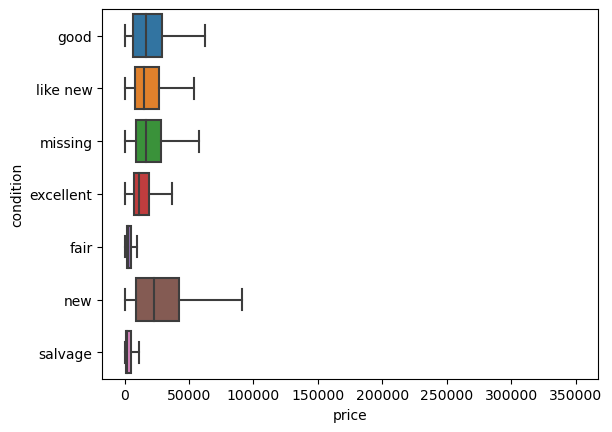

In [132]:
seaborn.boxplot(x=X_train['price'], y=X_train['condition'], fliersize=0)

Na boxplotu se može vidjeti određena nedosljednost oznaka za 'condition', npr. excellent izgleda lošije ocijenjen nego good itd.; to je potencijalno jer se 'good' čini kao najneutralnija oznaka, tim i najčešća, pa se u tome ogleda dio pristranosti postavljača oglasa. Pa iako se čini prirodno ovu značajku transformirati koristeći klasični ordinal encoder, i za njega ćemo koristiti One-Hot encoder, jer nema previše različitih vrijednosti.

Iako bi kategoriju 'cylinders' mogli transformirati u numeričku značajku poistovjećivanjem '8 cylinders = 8", nećemo to učiniti. Prirodnije je različite brojeve cilindara promatrati kao različite kategorije nego čisto numeričke varijable, jer razlika između 6 i 8 cilindara nije zapravo jednaka razlici 8 i 10 cilindara i ta razlika zapravo nije jasno opisana samo brojem 8 ili 10. Zato koristimo OneHot encoding i za 'cylinders' značajku.

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [243]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
ohe.fit(X_train[['cylinders', 'transmission', 'drive', 'condition', 'fuel', 'title_status']])

temp_X = pd.DataFrame(data=ohe.transform(X_train[['cylinders', 'transmission', 'drive', 'condition', 'fuel', 'title_status']]), columns=ohe.get_feature_names_out())
temp_Xtest = pd.DataFrame(data=ohe.transform(X_test[['cylinders', 'transmission', 'drive', 'condition', 'fuel', 'title_status']]), columns=ohe.get_feature_names_out())

X_train.drop(columns=['cylinders', 'transmission', 'drive', 'condition', 'fuel', 'title_status'], axis=1, inplace=True)
X_test.drop(columns=['cylinders', 'transmission', 'drive', 'condition', 'fuel', 'title_status'], axis=1, inplace=True)

X_train = pd.concat([X_train.reset_index(drop=True), temp_X], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), temp_Xtest], axis=1)

C:\Users\ivani\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Primijetimo da značajke state, manufacturer, type i paint_color imaju najviše jedinstvenih vrijednosti. Kako je njih daleko najviše, korištenje one hot encodinga bi previše povećalo broj značajki. Među ovim značajkama ne postoji neki jasan poredak, niti možemo odrediti jasnu razliku između pojedinih (neki diskretan, konstantan korak). Zato ćemo koristiti target encoding. Manufacturer i type se uostalom od kategoričkih značajki (izuzev možda conditiona, koji ima puno manje jedinstvenih vrijednosti) čine intuitivno kao najbolji prediktori.

In [150]:
import category_encoders as ce

In [241]:
encoder = ce.TargetEncoder(cols=['type', 'state', 'manufacturer', 'paint_color'])
encoder.fit(X_train, X_train['price'])
X_train=encoder.transform(X_train)
X_test=encoder.transform(X_test)

# Logaritmiranje

Pogledajmo kako su cijene distribuirane u train podatcima.

<Axes: xlabel='price', ylabel='Density'>

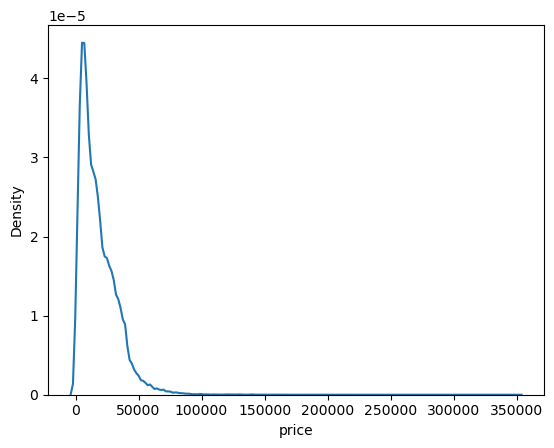

In [256]:
seaborn.kdeplot(X_train['price'])

Očito su vrijednosti značajno "skewed". Zato ćemo primijeniti jednostavno logaritmiranje. Drugi pristup bi eventualno bio imputanje rijetkih vrijednosti (u području outliera), koristeći npr. verziju SMOTE metode za probleme regresije kako bi balansirali nesrazmjer u broju podataka. To nećemo činit u ovom slučaju jer je većina značajki rezultat transformacije kategoričkih značajki. SMOTE radi tako što interpolira vrijednosti "najbližih susjeda" što bi u ovom slučaju moglo potencijalno dovesti do nelogičnog interpoliranja.

<Axes: xlabel='price', ylabel='Density'>

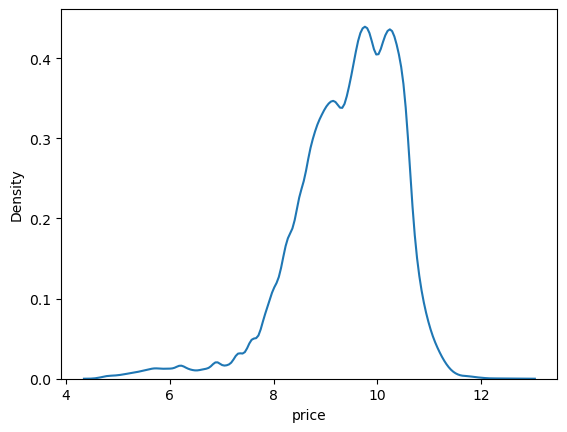

In [260]:
seaborn.kdeplot(np.log(X_train['price']))

In [293]:
X_train['price_log']=np.log(X_train['price'])
X_test['price_log']=np.log(X_test['price'])

# Standardiziranje značajki

Kako su nam numeričke značajke sve različitih redova veličine, trebali bismo ih standardizirati jer velika razlika u redovima veličine može utjecati na trenirani model. Koristit ćemo standardizaciju umjesto normalizacije ili običnog skaliranja nekog featura, jer su nam vrijednosti numeričkih značajki dosta raspršene. Recimo, pogotovo za price i odometer, imamo i jako niske i jako visoke vrijednosti, pa bi ih normalizacija sve stisla u jako uzak interval.

In [252]:
from sklearn.preprocessing import StandardScaler

In [295]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_std=pd.DataFrame(scaler.transform(X_train), columns=scaler.get_feature_names_out())
X_test_std=pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

Prije odabira i treniranja modela još samo trebamo razdvojiti veličinu koju predviđamo od onih koje koristimo za treniranje.

In [296]:
y_train=X_train_std['price_log']
y_test=X_test_std['price_log']

In [302]:
X_train_std.drop(['price', 'price_log'], inplace=True, axis=1)
X_test_std.drop(['price', 'price_log'], inplace=True, axis=1)